# Project: Markov chains and the supermarket

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import timedelta
import plotly.express as px

plt.rcParams['figure.figsize'] = (12, 8)
plt.style.use("ggplot")

## 1. Data exploration and preparation

In [2]:
monday = pd.read_csv("data/monday.csv", sep=";", parse_dates=["timestamp"])
tuesday = pd.read_csv("data/tuesday.csv", sep=";", parse_dates=["timestamp"])
wednesday = pd.read_csv("data/wednesday.csv", sep=";", parse_dates=["timestamp"])
thursday = pd.read_csv("data/thursday.csv", sep=";", parse_dates=["timestamp"])
friday = pd.read_csv("data/friday.csv", sep=";", parse_dates=["timestamp"])

In [3]:
frames = monday, tuesday, wednesday, thursday, friday
monday["day"] = "monday"
tuesday["day"] = "tuesday"
wednesday["day"] = "wednesday"
thursday["day"] = "thursday"
friday["day"] = "friday"

The customers need an unique id for the whole week.

In [4]:
tuesday["customer_no"] += monday["customer_no"].max()
wednesday["customer_no"] += tuesday["customer_no"].max()
thursday["customer_no"] += wednesday["customer_no"].max()
friday["customer_no"] += thursday["customer_no"].max()

In [5]:
week = pd.concat(frames).reset_index()
week.drop(columns=["index"], inplace=True)
week.head()

,timestamp,customer_no,location,day
0,2019-09-02 07:03:00,1,dairy,monday
1,2019-09-02 07:03:00,2,dairy,monday
2,2019-09-02 07:04:00,3,dairy,monday
3,2019-09-02 07:04:00,4,dairy,monday
4,2019-09-02 07:04:00,5,spices,monday


There are people which dont go to the checkout. This are only 28. So we will drop them.

In [6]:
mask = week.groupby(["customer_no"])["location"].transform(lambda x : "checkout" in ("".join(map(str, x))))
week = week[mask]

Encode the location into numbers and save it to a new column.

In [7]:
week['location'] = pd.Categorical(week["location"])
week['loc_num'] = week['location'].cat.codes

In [8]:
week.head(30)

,timestamp,customer_no,location,day,loc_num
0,2019-09-02 07:03:00,1,dairy,monday,1
1,2019-09-02 07:03:00,2,dairy,monday,1
2,2019-09-02 07:04:00,3,dairy,monday,1
3,2019-09-02 07:04:00,4,dairy,monday,1
4,2019-09-02 07:04:00,5,spices,monday,4
5,2019-09-02 07:04:00,6,spices,monday,4
6,2019-09-02 07:04:00,7,spices,monday,4
7,2019-09-02 07:04:00,8,fruit,monday,3
8,2019-09-02 07:05:00,1,checkout,monday,0
9,2019-09-02 07:05:00,5,checkout,monday,0


In [9]:
week_entrance = week.loc[week.groupby(["customer_no"])["timestamp"].idxmin().values]
week_entrance["location"] = "entrance"
week_entrance["loc_num"] = 5

In [10]:
week_entrance["timestamp"] -= timedelta(minutes=2)

In [11]:
week = week.append(week_entrance).sort_values("timestamp").reset_index()

In [12]:
week.head(20)

,index,timestamp,customer_no,location,day,loc_num
0,0,2019-09-02 07:01:00,1,entrance,monday,5
1,1,2019-09-02 07:01:00,2,entrance,monday,5
2,2,2019-09-02 07:02:00,3,entrance,monday,5
3,3,2019-09-02 07:02:00,4,entrance,monday,5
4,4,2019-09-02 07:02:00,5,entrance,monday,5
5,5,2019-09-02 07:02:00,6,entrance,monday,5
6,6,2019-09-02 07:02:00,7,entrance,monday,5
7,7,2019-09-02 07:02:00,8,entrance,monday,5
8,0,2019-09-02 07:03:00,1,dairy,monday,1
9,1,2019-09-02 07:03:00,2,dairy,monday,1


In [19]:
week_entrance[week_entrance["timestamp"] < "2019-09-04"].head(30)

,timestamp,customer_no,location,day,loc_num
0,2019-09-02 07:01:00,1,entrance,monday,5
1,2019-09-02 07:01:00,2,entrance,monday,5
2,2019-09-02 07:02:00,3,entrance,monday,5
3,2019-09-02 07:02:00,4,entrance,monday,5
4,2019-09-02 07:02:00,5,entrance,monday,5
5,2019-09-02 07:02:00,6,entrance,monday,5
6,2019-09-02 07:02:00,7,entrance,monday,5
7,2019-09-02 07:02:00,8,entrance,monday,5
14,2019-09-02 07:04:00,9,entrance,monday,5
15,2019-09-02 07:04:00,10,entrance,monday,5


Calculate the next location by ordering and shifting.

In [440]:
week["next_loc_num"] = week.sort_values(by=["customer_no", "timestamp"])["loc_num"].shift(-1)
week.head(10)

,index,timestamp,customer_no,location,day,loc_num,next_loc_num
0,0,2019-09-02 07:01:00,1,entrance,monday,5,1.0
1,1,2019-09-02 07:01:00,2,entrance,monday,5,1.0
2,2,2019-09-02 07:02:00,3,entrance,monday,5,1.0
3,3,2019-09-02 07:02:00,4,entrance,monday,5,1.0
4,4,2019-09-02 07:02:00,5,entrance,monday,5,4.0
5,5,2019-09-02 07:02:00,6,entrance,monday,5,4.0
6,6,2019-09-02 07:02:00,7,entrance,monday,5,4.0
7,7,2019-09-02 07:02:00,8,entrance,monday,5,3.0
8,0,2019-09-02 07:03:00,1,dairy,monday,1,0.0
9,1,2019-09-02 07:03:00,2,dairy,monday,1,0.0


### Calculate the total number of customers in each section

In [441]:
week_count = week.groupby(['timestamp', "loc_num", "day"]).agg({"customer_no":"count"}).reset_index()
week_count.rename(columns={"customer_no":"count"}, inplace=True)
week_count.head()

,timestamp,loc_num,day,count
0,2019-09-02 07:01:00,5,monday,2
1,2019-09-02 07:02:00,5,monday,6
2,2019-09-02 07:03:00,1,monday,2
3,2019-09-02 07:04:00,1,monday,2
4,2019-09-02 07:04:00,3,monday,1


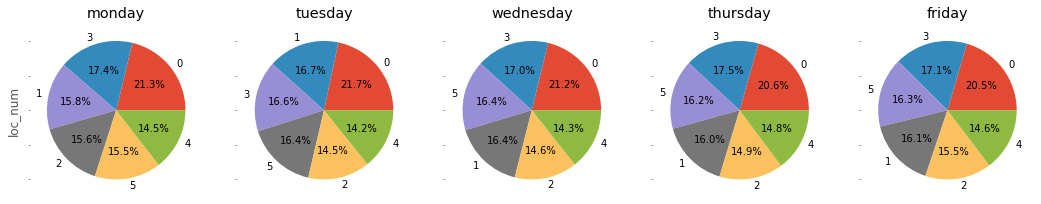

In [442]:
days = week["day"].unique()
f, axes = plt.subplots(1, 5, sharey=True, figsize=(18, 8))
for i, (ax, day) in enumerate(zip(axes, days)):
    week_count.loc[week_count["day"]==day]["loc_num"].value_counts().plot(kind="pie", 
                                                                           autopct='%1.1f%%', 
                                                                           title=day,
                                                                           ax=ax)

### Display cumulated number of customers in each section

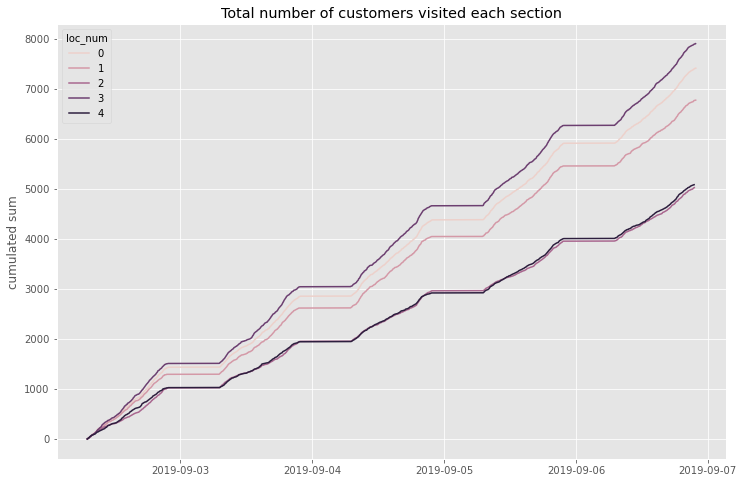

In [420]:
week_count["cumsum"] = week_count.groupby(["loc_num"])["count"].cumsum()

fig, ax = plt.subplots(1, 1)
sns.lineplot(data=week_count, x="timestamp", y="cumsum", hue="loc_num", ax=ax)
ax.set_ylabel("cumulated sum")
ax.set_xlabel("")
ax.set_title("Total number of customers visited each section");

### Display the number of customers at checkout over time

In [421]:
checked_out = week_count[week_count["loc_num"]==0]

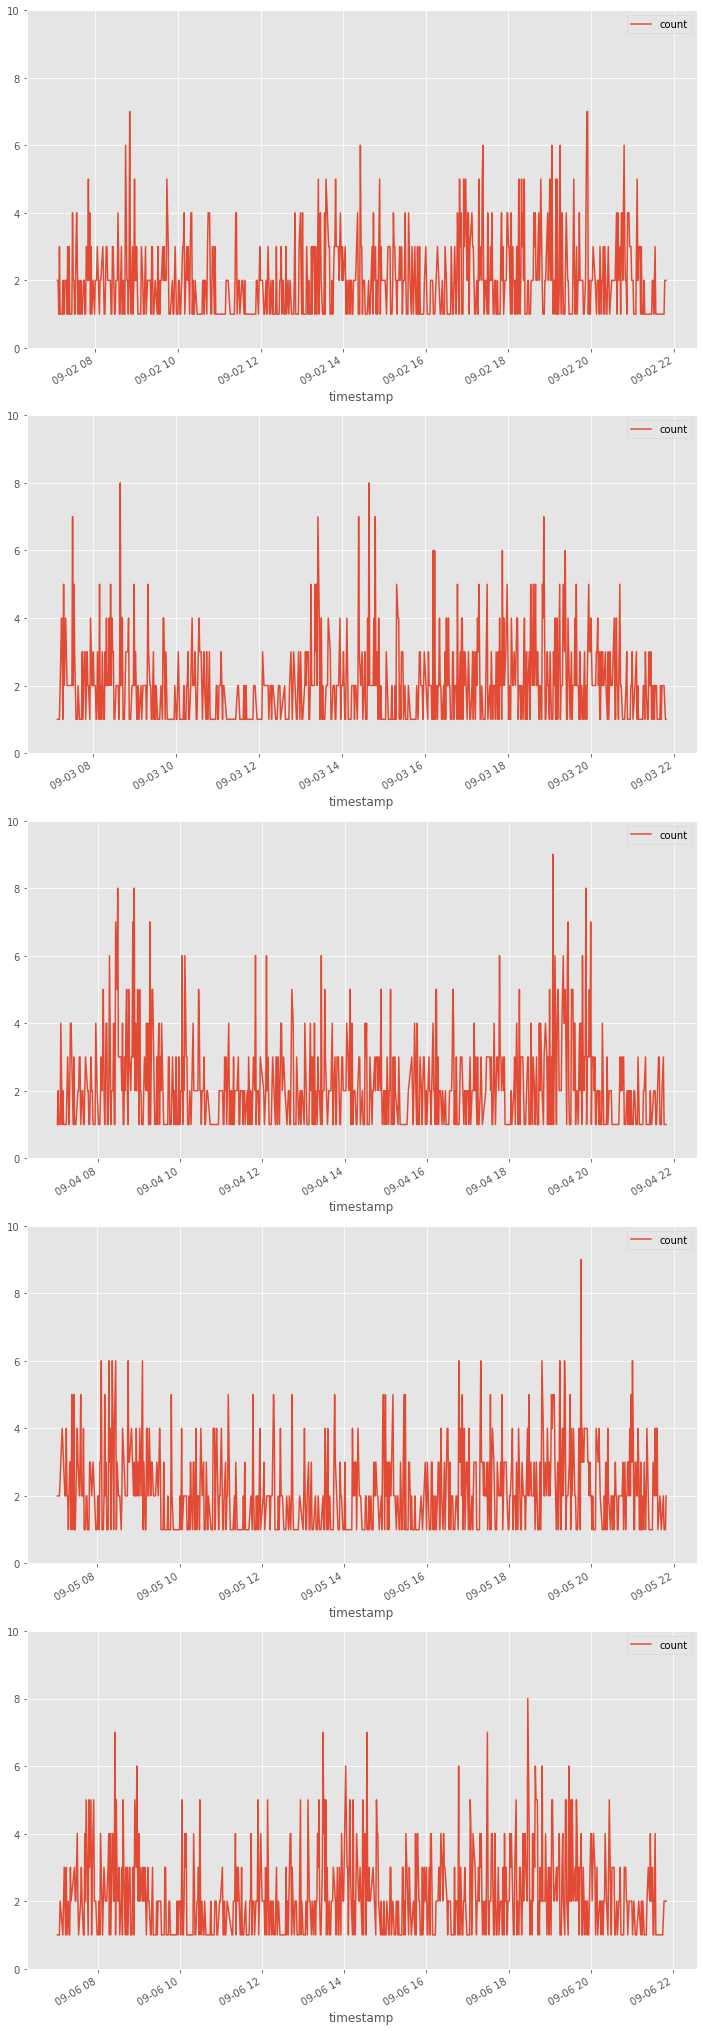

In [422]:
fig, axes = plt.subplots(5, 1, figsize=(12, 40))
for ax, day in zip(axes, days):
    checked_out.loc[checked_out["day"]==day].plot(x="timestamp", y="count", ax=ax)
    ax.set_ylim([0, 10])

### Calculate the time each customer spent in the market

In [423]:
week["start"] = week.groupby(["customer_no"])["timestamp"].transform(lambda x : min(x))
week["end"] = week.groupby(["customer_no"])["timestamp"].transform(lambda x : max(x))

In [424]:
week["time spend in min"] = (week["end"] - week["start"]).dt.seconds/60

In [425]:
week.head(10)

,index,timestamp,customer_no,location,day,loc_num,next_loc_num,start,end,time spend in min
0,0,2019-09-02 07:01:00,1,entrance,monday,1,1.0,2019-09-02 07:01:00,2019-09-02 07:05:00,4.0
1,1,2019-09-02 07:01:00,2,entrance,monday,1,1.0,2019-09-02 07:01:00,2019-09-02 07:06:00,5.0
2,2,2019-09-02 07:02:00,3,entrance,monday,1,1.0,2019-09-02 07:02:00,2019-09-02 07:06:00,4.0
3,3,2019-09-02 07:02:00,4,entrance,monday,1,1.0,2019-09-02 07:02:00,2019-09-02 07:08:00,6.0
4,4,2019-09-02 07:02:00,5,entrance,monday,4,4.0,2019-09-02 07:02:00,2019-09-02 07:05:00,3.0
5,5,2019-09-02 07:02:00,6,entrance,monday,4,4.0,2019-09-02 07:02:00,2019-09-02 07:29:00,27.0
6,6,2019-09-02 07:02:00,7,entrance,monday,4,4.0,2019-09-02 07:02:00,2019-09-02 07:13:00,11.0
7,7,2019-09-02 07:02:00,8,entrance,monday,3,3.0,2019-09-02 07:02:00,2019-09-02 07:07:00,5.0
8,0,2019-09-02 07:03:00,1,dairy,monday,1,0.0,2019-09-02 07:01:00,2019-09-02 07:05:00,4.0
9,1,2019-09-02 07:03:00,2,dairy,monday,1,0.0,2019-09-02 07:01:00,2019-09-02 07:06:00,5.0


### Two ways to calculate the transition matrix

#### 1. Use the function we used before for finding the people without checkouts

In [443]:
transitions = week.groupby(["customer_no"])["loc_num"].transform(lambda x : " ".join(map(str, x)))
transitions.head(8)

0                5 1 0
1                5 1 0
2                5 1 0
3                5 1 0
4                5 4 0
5    5 4 1 4 2 4 1 4 0
6          5 4 2 4 3 0
7                5 3 0
Name: loc_num, dtype: object

In [427]:
count = np.zeros((5,5))

for row in transitions:
    liste = row.split()
    liste = list(map(int, liste))
    for i in range(len(liste)-1):
        count[liste[i], liste[i+1]] += 1

def normalize_rows(x: np.ndarray):
    return x/np.linalg.norm(x, ord=1, axis=1, keepdims=True)

count = normalize_rows(count)

count[0] = 0

<ipython-input-427-1a1cc7320052>:10: RuntimeWarning: invalid value encountered in true_divide
  return x/np.linalg.norm(x, ord=1, axis=1, keepdims=True)


In [273]:
count

array([[0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.27073574, 0.        , 0.25277854, 0.22467163, 0.25181409],
       [0.4095305 , 0.02912097, 0.        , 0.27067913, 0.2906694 ],
       [0.36047296, 0.30013937, 0.16661422, 0.        , 0.17277346],
       [0.16815915, 0.36506564, 0.29317187, 0.17360334, 0.        ]])

#### 2. Use ordering and the shift function

In [186]:
week.sort_values(by="customer_no")

,timestamp,customer_no,location,day,loc_num,start,end,time spend in min,new_loc_num
0,2019-09-02 07:03:00,1,dairy,monday,1,2019-09-02 07:03:00,2019-09-02 07:05:00,2.0,1.0
8,2019-09-02 07:05:00,1,checkout,monday,0,2019-09-02 07:03:00,2019-09-02 07:05:00,2.0,0.0
1,2019-09-02 07:03:00,2,dairy,monday,1,2019-09-02 07:03:00,2019-09-02 07:06:00,3.0,1.0
12,2019-09-02 07:06:00,2,checkout,monday,0,2019-09-02 07:03:00,2019-09-02 07:06:00,3.0,0.0
2,2019-09-02 07:04:00,3,dairy,monday,1,2019-09-02 07:04:00,2019-09-02 07:06:00,2.0,1.0
...,...,...,...,...,...,...,...,...,...
24862,2019-09-06 21:48:00,7439,checkout,friday,0,2019-09-06 21:47:00,2019-09-06 21:48:00,1.0,1.0
24873,2019-09-06 21:50:00,7442,checkout,friday,0,2019-09-06 21:48:00,2019-09-06 21:50:00,2.0,0.0
24865,2019-09-06 21:48:00,7442,dairy,friday,1,2019-09-06 21:48:00,2019-09-06 21:50:00,2.0,1.0
24866,2019-09-06 21:48:00,7443,dairy,friday,1,2019-09-06 21:48:00,2019-09-06 21:50:00,2.0,0.0


In [178]:
transitions.head()

0    1 0
1    1 0
2    1 0
3    1 0
4    4 0
Name: loc_num, dtype: object

### Calculate the total number of customers in the supermarket over time.

In [220]:
week.tail()

,timestamp,customer_no,location,day,loc_num,next_loc_num,start,end,time spend in min
24862,2019-09-06 21:48:00,7439,checkout,friday,0,0.0,2019-09-06 21:47:00,2019-09-06 21:48:00,1.0
24865,2019-09-06 21:48:00,7442,dairy,friday,1,1.0,2019-09-06 21:48:00,2019-09-06 21:50:00,2.0
24866,2019-09-06 21:48:00,7443,dairy,friday,1,0.0,2019-09-06 21:48:00,2019-09-06 21:50:00,2.0
24873,2019-09-06 21:50:00,7442,checkout,friday,0,1.0,2019-09-06 21:48:00,2019-09-06 21:50:00,2.0
24874,2019-09-06 21:50:00,7443,checkout,friday,0,NaN,2019-09-06 21:48:00,2019-09-06 21:50:00,2.0


In [119]:
week.head(10)

,timestamp,customer_no,location,day,loc_num,start,end,time spend in min
0,2019-09-02 07:03:00,1,dairy,monday,1,2019-09-02 07:03:00,2019-09-02 07:05:00,2.0
1,2019-09-02 07:03:00,2,dairy,monday,1,2019-09-02 07:03:00,2019-09-02 07:06:00,3.0
2,2019-09-02 07:04:00,3,dairy,monday,1,2019-09-02 07:04:00,2019-09-02 07:06:00,2.0
3,2019-09-02 07:04:00,4,dairy,monday,1,2019-09-02 07:04:00,2019-09-02 07:08:00,4.0
4,2019-09-02 07:04:00,5,spices,monday,4,2019-09-02 07:04:00,2019-09-02 07:05:00,1.0
5,2019-09-02 07:04:00,6,spices,monday,4,2019-09-02 07:04:00,2019-09-02 07:29:00,25.0
6,2019-09-02 07:04:00,7,spices,monday,4,2019-09-02 07:04:00,2019-09-02 07:13:00,9.0
7,2019-09-02 07:04:00,8,fruit,monday,3,2019-09-02 07:04:00,2019-09-02 07:07:00,3.0
8,2019-09-02 07:05:00,1,checkout,monday,0,2019-09-02 07:03:00,2019-09-02 07:05:00,2.0
9,2019-09-02 07:05:00,5,checkout,monday,0,2019-09-02 07:04:00,2019-09-02 07:05:00,1.0


In [221]:
time = np.asarray(week["timestamp"])

In [222]:
week[week["customer_no"]==1]

,timestamp,customer_no,location,day,loc_num,next_loc_num,start,end,time spend in min
0,2019-09-02 07:03:00,1,dairy,monday,1,0.0,2019-09-02 07:03:00,2019-09-02 07:05:00,2.0
8,2019-09-02 07:05:00,1,checkout,monday,0,1.0,2019-09-02 07:03:00,2019-09-02 07:05:00,2.0


In [234]:
mask = np.logical_and(week["timestamp"] < pd.to_datetime("2019-09-02 07:05:00"), time > pd.to_datetime("2019-09-02 07:03:00"))
start_end = week.groupby(["customer_no"])[["start", "end"]].min().reset_index()
start_end.shape, time.shape

((7417, 3), (24798,))

In [235]:
start_end.head()

,customer_no,start,end
0,1,2019-09-02 07:03:00,2019-09-02 07:05:00
1,2,2019-09-02 07:03:00,2019-09-02 07:06:00
2,3,2019-09-02 07:04:00,2019-09-02 07:06:00
3,4,2019-09-02 07:04:00,2019-09-02 07:08:00
4,5,2019-09-02 07:04:00,2019-09-02 07:05:00


In [237]:
start_end.iloc[1427].loc["start"]

Timestamp('2019-09-02 21:32:00')

In [245]:
week.sort_values(by=["customer_no", "timestamp"]).head(20)

,timestamp,customer_no,location,day,loc_num,next_loc_num,start,end,time spend in min
0,2019-09-02 07:03:00,1,dairy,monday,1,0.0,2019-09-02 07:03:00,2019-09-02 07:05:00,2.0
8,2019-09-02 07:05:00,1,checkout,monday,0,1.0,2019-09-02 07:03:00,2019-09-02 07:05:00,2.0
1,2019-09-02 07:03:00,2,dairy,monday,1,0.0,2019-09-02 07:03:00,2019-09-02 07:06:00,3.0
12,2019-09-02 07:06:00,2,checkout,monday,0,1.0,2019-09-02 07:03:00,2019-09-02 07:06:00,3.0
2,2019-09-02 07:04:00,3,dairy,monday,1,0.0,2019-09-02 07:04:00,2019-09-02 07:06:00,2.0
13,2019-09-02 07:06:00,3,checkout,monday,0,1.0,2019-09-02 07:04:00,2019-09-02 07:06:00,2.0
3,2019-09-02 07:04:00,4,dairy,monday,1,0.0,2019-09-02 07:04:00,2019-09-02 07:08:00,4.0
24,2019-09-02 07:08:00,4,checkout,monday,0,4.0,2019-09-02 07:04:00,2019-09-02 07:08:00,4.0
4,2019-09-02 07:04:00,5,spices,monday,4,0.0,2019-09-02 07:04:00,2019-09-02 07:05:00,1.0
9,2019-09-02 07:05:00,5,checkout,monday,0,4.0,2019-09-02 07:04:00,2019-09-02 07:05:00,1.0


In [242]:
for i in range(len(start_end)):
    mask = np.logical_and(time < start_end.iloc[i].loc["end"], time > start_end.iloc[i].loc["start"])
    print(week[mask]["timestamp"].unique())

['2019-09-02T07:04:00.000000000']
['2019-09-02T07:04:00.000000000' '2019-09-02T07:05:00.000000000']
['2019-09-02T07:05:00.000000000']
['2019-09-02T07:05:00.000000000' '2019-09-02T07:06:00.000000000'
 '2019-09-02T07:07:00.000000000']
[]
['2019-09-02T07:05:00.000000000' '2019-09-02T07:06:00.000000000'
 '2019-09-02T07:07:00.000000000' '2019-09-02T07:08:00.000000000'
 '2019-09-02T07:09:00.000000000' '2019-09-02T07:10:00.000000000'
 '2019-09-02T07:11:00.000000000' '2019-09-02T07:12:00.000000000'
 '2019-09-02T07:13:00.000000000' '2019-09-02T07:14:00.000000000'
 '2019-09-02T07:15:00.000000000' '2019-09-02T07:16:00.000000000'
 '2019-09-02T07:17:00.000000000' '2019-09-02T07:18:00.000000000'
 '2019-09-02T07:19:00.000000000' '2019-09-02T07:20:00.000000000'
 '2019-09-02T07:21:00.000000000' '2019-09-02T07:22:00.000000000'
 '2019-09-02T07:23:00.000000000' '2019-09-02T07:24:00.000000000'
 '2019-09-02T07:25:00.000000000' '2019-09-02T07:26:00.000000000'
 '2019-09-02T07:27:00.000000000' '2019-09-02T07:2

In [416]:
start_end = week.groupby(["customer_no"])[["start", "end"]].min()

,start,end
customer_no,,
1,2019-09-02 07:03:00,2019-09-02 07:05:00
2,2019-09-02 07:03:00,2019-09-02 07:06:00
3,2019-09-02 07:04:00,2019-09-02 07:06:00
4,2019-09-02 07:04:00,2019-09-02 07:08:00
5,2019-09-02 07:04:00,2019-09-02 07:05:00
...,...,...
7436,2019-09-06 21:46:00,2019-09-06 21:48:00
7437,2019-09-06 21:46:00,2019-09-06 21:47:00
7439,2019-09-06 21:47:00,2019-09-06 21:48:00


In [402]:
week.tail()

,timestamp,customer_no,location,day,start,end,time spend in min
24862,2019-09-06 21:48:00,7439,checkout,friday,2019-09-06 21:47:00,2019-09-06 21:48:00,1.0
24865,2019-09-06 21:48:00,7442,dairy,friday,2019-09-06 21:48:00,2019-09-06 21:50:00,2.0
24866,2019-09-06 21:48:00,7443,dairy,friday,2019-09-06 21:48:00,2019-09-06 21:50:00,2.0
24873,2019-09-06 21:50:00,7442,checkout,friday,2019-09-06 21:48:00,2019-09-06 21:50:00,2.0
24874,2019-09-06 21:50:00,7443,checkout,friday,2019-09-06 21:48:00,2019-09-06 21:50:00,2.0


In [444]:
count = np.zeros((6, 6))

In [446]:
for row in transitions:
    liste = row.split()
    liste = list(map(int, liste))
    for i in range(len(liste)-1):
        count[liste[i], liste[i+1]] += 1

def normalize_rows(x: np.ndarray):
    return x/np.linalg.norm(x, ord=1, axis=1, keepdims=True)

count = normalize_rows(count)

In [448]:
count[0] = 0

In [449]:
count

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.29214759, 0.        , 0.24741722, 0.21854305, 0.24189215,
        0.        ],
       [0.43200286, 0.02879721, 0.        , 0.26149656, 0.27770337,
        0.        ],
       [0.38665204, 0.28835253, 0.16098007, 0.        , 0.16401536,
        0.        ],
       [0.18150729, 0.35844056, 0.28991579, 0.17013637, 0.        ,
        0.        ],
       [0.        , 0.2952041 , 0.14514977, 0.36420922, 0.19543691,
        0.        ]])